# Building starting models

## References:

1. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
3. https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
4. https://scikit-learn.org/stable/modules/kernel_approximation.html#nystroem-kernel-approx

## Re-Norm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cleaned_data_wo_genres.csv')

In [3]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.986,['Dick Haymes'],0.208,182227,0.234,0,5DihlLenQJhJXGJhbtiTrM,0.656000,8,0.2340,-15.427,1,Till the End of Time,0,1920,0.0426,85.288,0.2090,1920
2,0.994,['Dick Haymes'],0.392,165253,0.128,0,5EwQxd2XGjp1BUZT2iHhEj,0.153000,2,0.0983,-15.220,1,You'll Never Know,0,1920,0.0378,126.728,0.2260,1920
3,0.992,['Dick Haymes'],0.344,171160,0.196,0,5LnfrTxUQwINaVUIqaNmXa,0.004410,0,0.1570,-13.969,1,A Chapter in My Life Called Mary,0,1920,0.0365,79.837,0.3540,1920
4,0.891,"['ST', '98', 'R2S', 'Niklas O']",0.410,181969,0.296,1,5RgQ7t5uimI5St2H3CV9pb,0.000005,0,0.0910,-13.879,0,Moyenne d'âge,0,1920,0.0386,127.946,0.0625,1920


In [4]:
data.drop(['id', 'name', 
           'release_date'], axis=1, inplace=True)

In [5]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
1,0.986,['Dick Haymes'],0.208,182227,0.234,0,0.656000,8,0.2340,-15.427,1,0,0.0426,85.288,0.2090,1920
2,0.994,['Dick Haymes'],0.392,165253,0.128,0,0.153000,2,0.0983,-15.220,1,0,0.0378,126.728,0.2260,1920
3,0.992,['Dick Haymes'],0.344,171160,0.196,0,0.004410,0,0.1570,-13.969,1,0,0.0365,79.837,0.3540,1920
4,0.891,"['ST', '98', 'R2S', 'Niklas O']",0.410,181969,0.296,1,0.000005,0,0.0910,-13.879,0,0,0.0386,127.946,0.0625,1920


<AxesSubplot:ylabel='Frequency'>

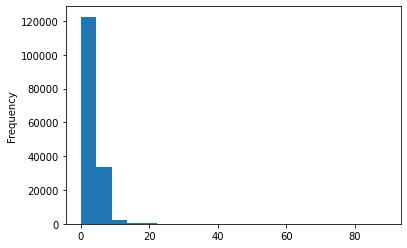

In [6]:
(data.duration_ms/60_000).plot.hist(bins=20, label='Number of songs')


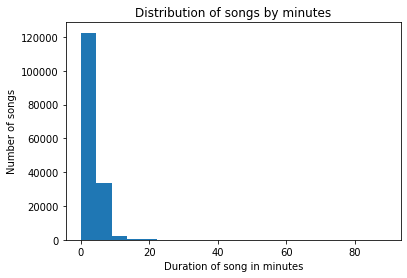

In [7]:
plt.hist(data['duration_ms']/60000, bins=20)
plt.title("Distribution of songs by minutes")
plt.xlabel("Duration of song in minutes")
plt.ylabel("Number of songs")
plt.show()

In [8]:
data = data.loc[(data.duration_ms/60_000) <= 10]

In [9]:
#cols = ['duration_ms', 'loudness', 'tempo']

cols = ['duration_ms', 'loudness', 'tempo', 'acousticness', 'danceability', 'energy',
      'instrumentalness', 'liveness', 'speechiness', 'valence']

In [10]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler, OneHotEncoder

In [11]:
scaler = StandardScaler()
#scaler = MaxAbsScaler()
#scaler = MinMaxScaler()

In [12]:
data.loc[data.index, cols] = scaler.fit_transform(data[cols]) 

In [13]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,1.290829,['Mamie Smith'],0.343090,-0.586049,-0.946776,0,-0.578414,5,0.929594,-0.152122,0,12,-0.082136,1.085064,0.402700,1920
1,1.277648,['Dick Haymes'],-1.888467,-0.431375,-0.909987,0,1.401622,8,0.123664,-0.645386,1,0,-0.352830,-1.045986,-1.213104,1920
2,1.298737,['Dick Haymes'],-0.835630,-0.620337,-1.299951,0,-0.117816,2,-0.630575,-0.608907,1,0,-0.378308,0.319193,-1.148472,1920
3,1.293465,['Dick Haymes'],-1.110283,-0.554578,-1.049785,0,-0.566669,0,-0.304312,-0.388445,1,0,-0.385208,-1.225561,-0.661830,1920
4,1.027206,"['ST', '98', 'R2S', 'Niklas O']",-0.732635,-0.434248,-0.681894,1,-0.579976,0,-0.671149,-0.372584,0,0,-0.374061,0.359318,-1.770082,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159436,1.269739,"['Mysterious World Music', 'Relaxing Zen Music...",1.355874,-0.097726,-1.685132,0,1.797341,6,-0.812326,-0.987093,1,0,-0.350707,-1.219499,0.151775,2021
159437,1.280284,"['Mysterious World Music', 'Relaxing Zen Music...",1.538976,-0.424418,-1.635099,0,1.939316,7,0.045850,-0.355314,1,0,-0.141583,-1.217687,-1.182689,2021
159438,0.905940,"['Mysterious World Music', 'Relaxing Zen Music...",-1.877023,-0.803343,-1.755951,0,2.211184,1,-0.548870,-2.522573,1,0,-0.346461,-1.335461,-1.879576,2021
159439,1.296101,"['Mysterious World Music', 'Relaxing Zen Music...",0.634909,-0.293801,-1.702055,0,2.190039,3,-0.724508,-1.644778,0,0,-0.249330,-1.219697,0.509153,2021


In [14]:
one_enc = OneHotEncoder(sparse=False)

In [15]:
enc = one_enc.fit_transform(data.key.values.reshape(-1,1))

In [16]:
enc.shape

(157104, 12)

In [17]:
enc_col_names= ['key_'+str(i) for i in range(12)]

In [18]:
enc_df = pd.DataFrame(enc, columns=enc_col_names)
enc_df.head()

,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
new_data = pd.concat([data.reset_index(drop=True), enc_df], axis=1)

In [20]:
new_data['decade'] = ((new_data['year'] // 10) *10).astype("category")

In [21]:
new_data.to_csv('recleaned_data_stdscle_v2.csv', index=False)